In [118]:
#--------RGB histogram match---------------------#

import PIL
from PIL import Image
import imagehash
import os
import cv2
import time
from pprint import pprint
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random

#to reload module: uncomment use the following 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
# reading query image
# q_path = random.sample(trainhistpath, 1)[0]
# q_path = './imagesbooks/ukbench06049.jpg'
q_path = './imagesbooks/ukbench08595.jpg'
print (q_path)
q_paths = list(paths.list_images('./imagesbooks'))

./imagesbooks/ukbench08595.jpg


In [233]:
# visualizing the histogram
def showHistograms (q_paths,texts=['']*len(q_paths)): # list of paths 
    l=0
    for q_path in q_paths:
        img = cv2.imread(q_path)
        color = ('b','g','r')
        plt.figure(figsize=(4,4))
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            histr = cv2.normalize(histr, None)
            plt.plot(histr,color = col, linewidth=2.0)
            plt.xlim([0,256])
        plt.title(texts[l])
        plt.show()
        l+=1

def showHistogramTable (q_paths, texts=['']*len(q_paths), sfactor=5, columns = 5):
    # sfactor = 5, 
    # columns = 5
    rows = len(q_paths)//columns + ( 1 if (len(q_paths)%columns > 0 ) else 0 )
    l = 0
    fig=plt.figure(figsize=(sfactor*columns, sfactor*rows))
    ax = []
    for i in range(1, columns*rows +1):
        if l<len(q_paths) :             
#             plt.figure(figsize=(4,4))
            ax.append(fig.add_subplot(rows, columns, i))

            img = cv2.imread(q_paths[l])
            color = ('b','g','r')
            
            for i,col in enumerate(color):
                histr = cv2.calcHist([img],[i],None,[256],[0,256])
                histr = cv2.normalize(histr, None)
                plt.title(texts[l])
                # plt.plot(histr,color = col)
                ax[-1].plot(histr,color = col, linewidth=2.0)
                # ax[-1].xlim([0,256])    
            # ax[-1].set_title('score= %2.2f'%texts[l])            
            # ax[-1].set_title(texts[l])
            # plt.imshow(img)
            l+= 1

def showImages (q_paths,texts=['']*len(q_paths)): # list of paths 
    l=0
    for item in q_paths : 
        plt.figure(figsize = (4,4))
        img = plt.imread (item)
        plt.imshow (img)
        plt.title(texts[l])
        plt.show()
        l+=1
        
def showImagesTable (q_paths, texts=['']*len(q_paths), sfactor = 3, columns = 5): 
    # sfactor = 3
    # columns = 5
    
    rows = len(q_paths)//columns + ( 1 if (len(q_paths)%columns > 0 ) else 0 )
    l = 0
    fig=plt.figure(figsize=(sfactor*columns, sfactor*rows))
    ax = []
 
    # start plotting 
    for i in range(1, columns*rows +1):
        if l<len(q_paths) : 
            img = plt.imread(q_paths[l])
            ax.append(fig.add_subplot(rows, columns, i))
#             ax[-1].set_title('score= %2.2f'%texts[l])            
            ax[-1].set_title(texts[l])
            plt.imshow(img)
        l +=1
    plt.show()

# -----------------------
# notes 
# columns = len(d)
# rows = 1
# define fig as function of row, col
# fig=plt.figure(figsize=(rows*1, columns*1))
# fig=plt.figure(figsize=(10,10))
# fig=plt.figure(figsize=(20*columns, 20))

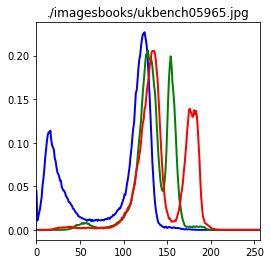

In [234]:
showHistograms ([q_path],[q_path])

In [114]:
q_paths = ['./imagesbooks/ukbench06049.jpg', './imagesbooks/ukbench06050.jpg', './imagesbooks/ukbench06051.jpg', './imagesbooks/ukbench06048.jpg', './imagesbooks/ukbench05598.jpg', './imagesbooks/ukbench05964.jpg', './imagesbooks/ukbench05599.jpg', './imagesbooks/ukbench05603.jpg', './imagesbooks/ukbench05600.jpg', './imagesbooks/ukbench05965.jpg', './imagesbooks/ukbench05966.jpg', './imagesbooks/ukbench05602.jpg', './imagesbooks/ukbench05967.jpg']

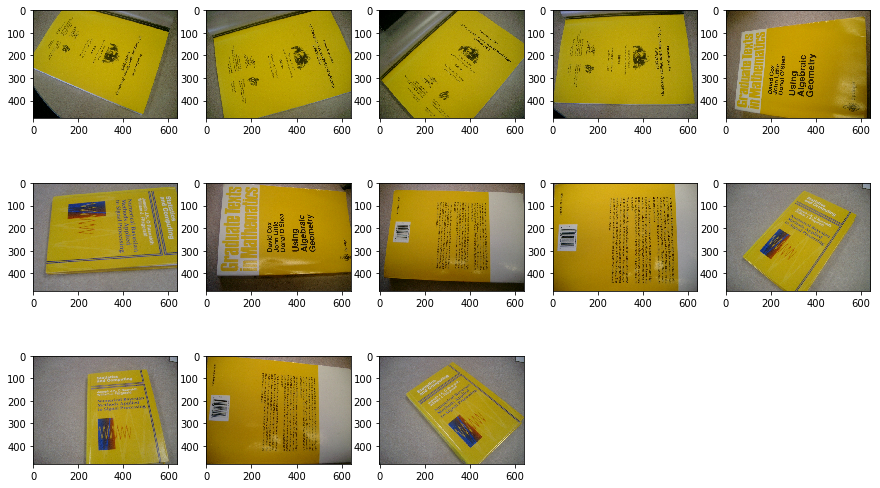

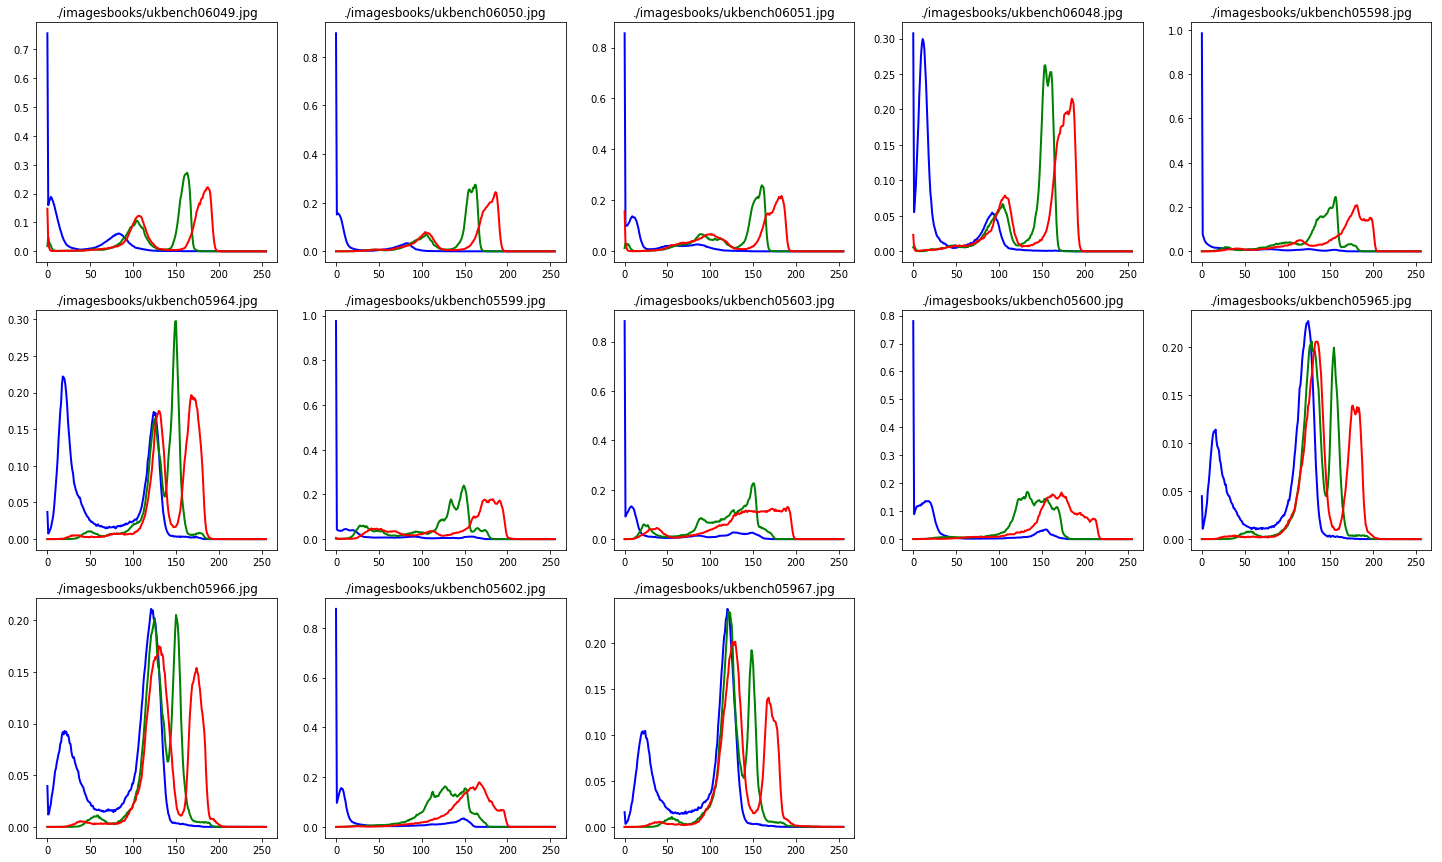

In [115]:
# q_paths = sorted(list(paths.list_images('./imagesbooks')))
q_list = q_paths
# showImages(q_list)
# showImagesTable (q_list)
showImagesTable (q_list)
showHistogramTable(q_list, q_list)

## Hist Equalization 

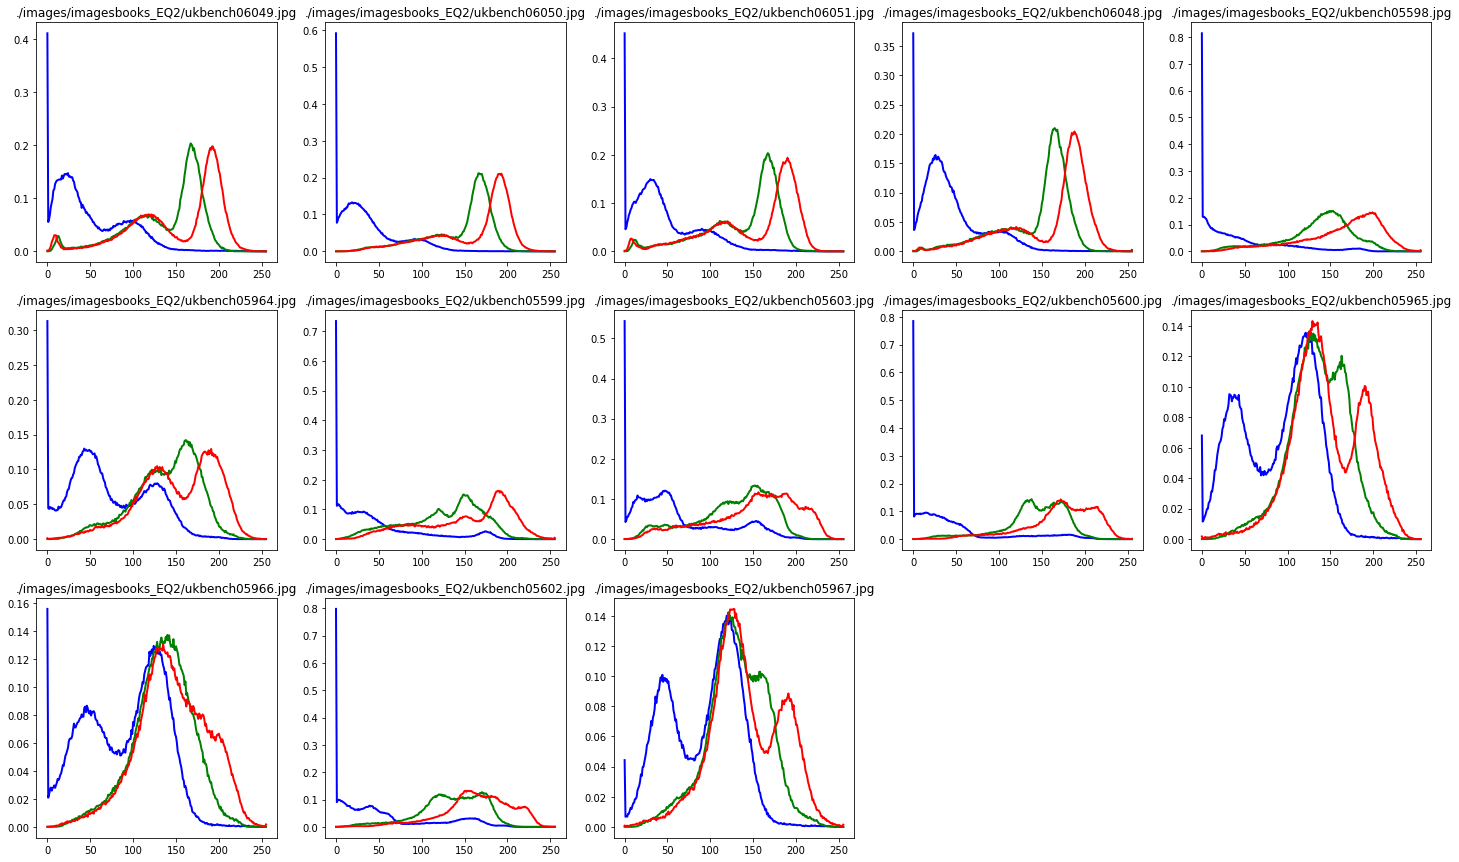

In [7]:
# q_paths = sorted(list(paths.list_images('./images/imagesbooks_EQ2/')))
q_list = q_paths
# showImages(q_list)
# showImagesTable (q_list)

# show equalized historgams for the same images 
dq_list = [w.replace('imagesbooks', 'images/imagesbooks_EQ2') for w in q_list]
showHistogramTable(dq_list, dq_list)

## Contrast 2.0 

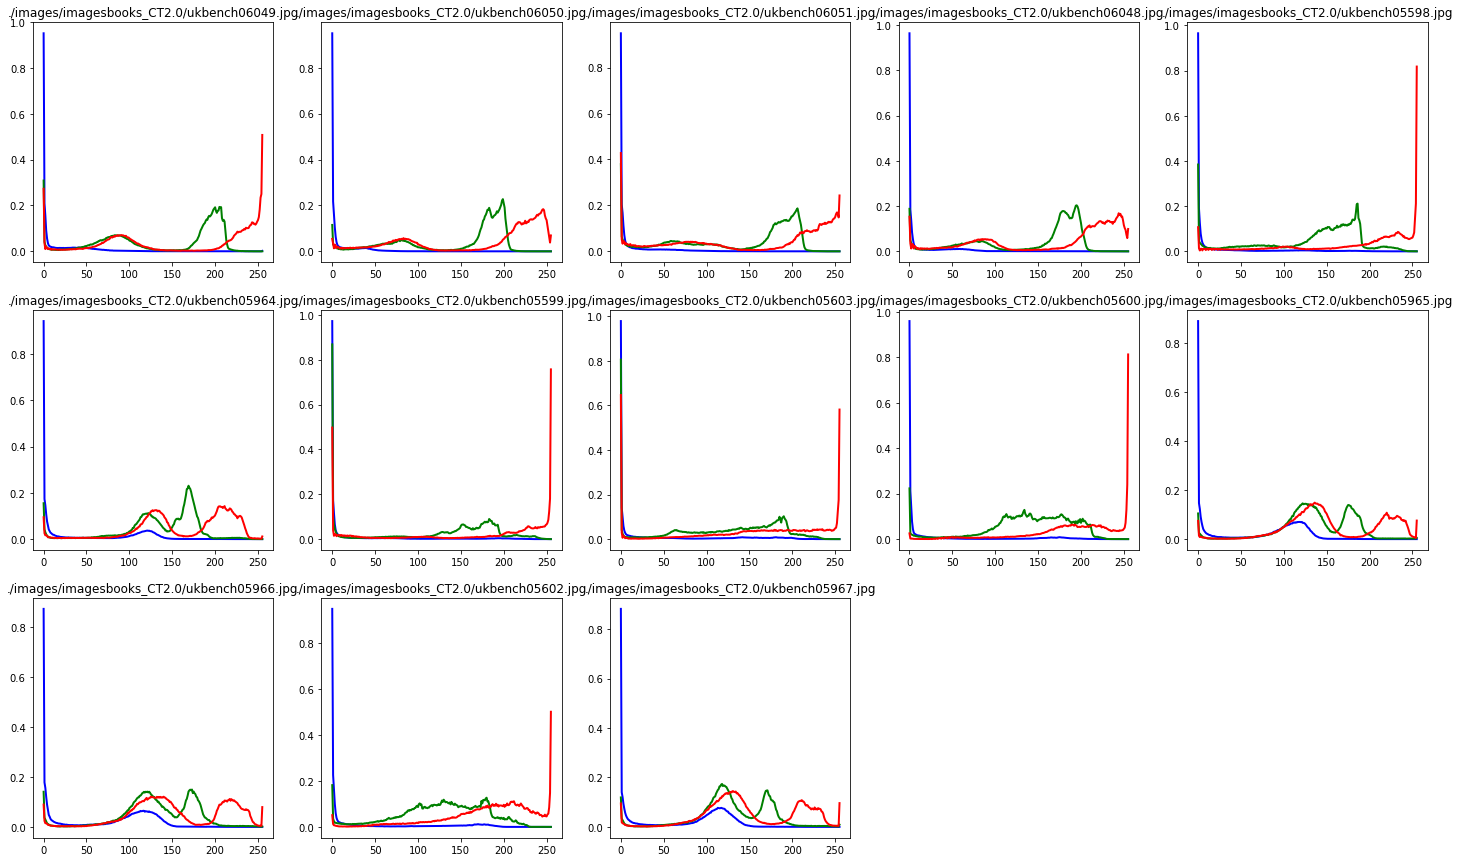

In [8]:
# show equalized historgams for the same images 
dq_list = [w.replace('imagesbooks', 'images/imagesbooks_CT2.0') for w in q_list]
showHistogramTable(dq_list, dq_list)

# Generate RGB Histograms 

In [124]:
#### check Gaussian nature of scores and success positions
import ImageSearch_Algo_HSV
import ImageSearch_Algo_RGB
import ImageSearch_Algo_SIFT
import Accuracy as accuracy
from kneed import KneeLocator
import random 
import matplotlib.pyplot as plt

In [125]:
IMGDIR = './imagesbooks/'
trainhistpath = list(paths.list_images(IMGDIR))
# print (TrainhistPaths)

# init RGB dataframe for Training image lib-------#
Trainhist = pd.DataFrame(columns=['file','imagehist'])

start = time.time()

for f in trainhistpath:
    image = cv2.imread(f)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    # hist = cv2.normalize(hist, None)
    Trainhist =  Trainhist.append({'file':f,'imagehist':hist}, ignore_index=True)

t= time.time() - start
print("[INFO] processed {} images in {:.2f} seconds".format(
len(trainhistpath), t))
print (Trainhist.head())

[INFO] processed 520 images in 6.80 seconds
                             file  \
0  ./imagesbooks/ukbench03097.jpg   
1  ./imagesbooks/ukbench08609.jpg   
2  ./imagesbooks/ukbench07999.jpg   
3  ./imagesbooks/ukbench02725.jpg   
4  ./imagesbooks/ukbench05956.jpg   

                                           imagehist  
0  [[[538.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],...  
1  [[[94563.0, 6783.0, 78.0, 2.0, 0.0, 0.0, 0.0, ...  
2  [[[679.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ...  
3  [[[32842.0, 152.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  
4  [[[13325.0, 34.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  


In [169]:
def getCorrScores (q_path):
    # q_path = './imagesbooks/ukbench06049.jpg'
    q_img = cv2.imread(q_path)
    query_paths = [q_path]
    # histogram of query images 
    hist_query = []
    for path in query_paths:
        image = cv2.imread(path)

        if image is None:
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # extract a RGB color histogram from the image,
        # using 8 bins per channel, normalize, and update the index
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
        # hist = cv2.normalize(hist, None)
        hist_query.append((path,hist))

    # Histmatch = pd.DataFrame(colums= ['file','matches'])
    hist_matches = []
    for i in range(len(hist_query)):
        matches = []

        for index, row in Trainhist.iterrows():

            cmp = cv2.compareHist(hist_query[i][1], row['imagehist'], cv2.HISTCMP_CORREL)   
            # cmp = cv2.compareHist(hist_query[i][1], row['imagehist'], cv2.HISTCMP_BHATTACHARYYA)


            #if cmp > 0.3:
            matches.append((cmp, row['file']))

        matches.sort(key=lambda x : x[0] , reverse = True) # True if Corr ; False if Distance like Bhatta, ChiSQ, Manhattan 
        hist_matches.append((hist_query[i][0],matches))
    return hist_matches

    # print (hist_matches)

In [165]:
# q_path = './imagesbooks/ukbench06048.jpg'
# q_path = './imagesbooks/ukbench10167.jpg' # tough one
q_path = './imagesbooks/ukbench05965.jpg'


q ,  myscore = getCorrScores(q_path)[0]
res = list(zip(*myscore)) # unzip to list 

X = np.asarray(res[0])

In [166]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

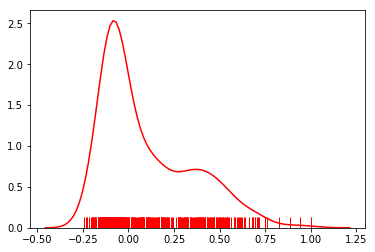

In [167]:
sns.distplot(X, hist=False, rug=True, color='r');

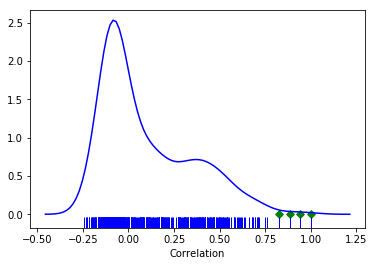

In [168]:
score = []
successScore = []
# score, file = item
for item in myscore:
    x, y = item
    score.append(x)
# print(score)
a, d, ind, cnt = accuracy.accuracy_matches(q_path, myscore, 20)
successPositions =ind
for i in ind: 
    successScore.append(score[i])

# PLOT 
# sns.set(style="whitegrid")
sns.distplot(X, hist=False, rug=True, color='b', axlabel='Correlation' )
plt.scatter(successScore, [0]*len(successScore) , c='g', s=30, marker='D' )


In [140]:
successScore, successPositions

([0.0, 0.18594484616561238, 0.2638565210103091, 0.40457738733786663],
 [0, 1, 2, 9])

# DISTRIBUTION PLOT RGB

In [217]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plotDistribution (q_path, imagematches, myxlabel = "Score", mytitle='Match_spread' ): 
    #q ,  myscore = getCorrScores(q_path)[0]
    res = list(zip(*imagematches)) # unzip to list 
    X = np.asarray(res[0])
    
    score = X
    successScore = []

    # print(score)
    a, d, ind, cnt = accuracy.accuracy_matches(q_path, imagematches, 20)
    successPositions =ind
    for i in ind: 
        successScore.append(score[i])

    # PLOT 
    # sns.set(style="whitegrid")
    sns.distplot(X, hist=False, rug=True, color='b', axlabel=myxlabel )
    #sns.kdeplot(X)
    #sns.distplot(X, hist=True, rug=True, color='b', axlabel='Correlation' )

    plt.scatter(successScore, [0]*len(successScore) , c='r', s=30, marker='D' )
    # plt.vlines(successScore, ymin=0, ymax=6,colors='r')
    #for x in successScore : plt.axvline(x,colors='r') 
    plt.title(mytitle)
    plt.show()

In [218]:
print(q_path)

./imagesbooks/ukbench05965.jpg


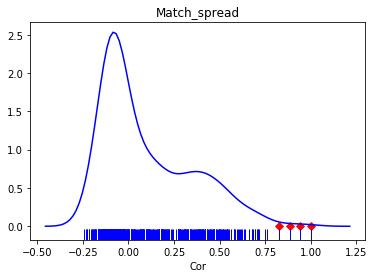

In [219]:
plotDistribution(q_path, myscore, myxlabel="Cor" )

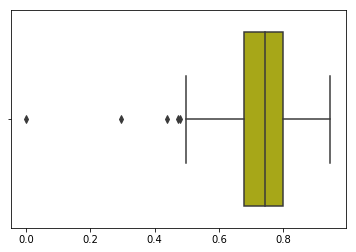

In [108]:
sns.boxplot(X, color='y')

In [206]:
# Threshold chart Score vs Sorted Samples
def plot_match_scores(imagematches, myxlabel='n_sample', myylabel='score', mytitle = ''): 
    score = []
    successScore = []
    # score, file = item
    for item in imagematches:
        x, y = item
        score.append(x)
    # print(score)
    a, d, ind, cnt = accuracy.accuracy_matches(q_path, imagematches, 20)
    successPositions =ind
    for i in ind: 
        successScore.append(score[i])

    #  can throw exceptions in case of less points

#     knee = 6
#     try : 
#         elbow = KneeLocator( list(range(0,len(score))), score, S=2.0, curve='convex', direction='increasing')
#         print ('Detected Elbow cluster value :', elbow.knee)
#         knee = elbow.knee
#     except: 
#         pass    
#     qualifiedItems = min (knee, 6)

    # plt.scatter ( [counter]*len(imagematches), score, c=matchesposition)
    plt.plot(score, c = 'b')
    plt.scatter(successPositions, successScore, c='r' )
    # plt.vlines( qualifiedItems , 0, max(score), colors='g')
    plt.xlabel(myxlabel)
    plt.ylabel(myylabel)
    plt.title(mytitle)
    plt.show()

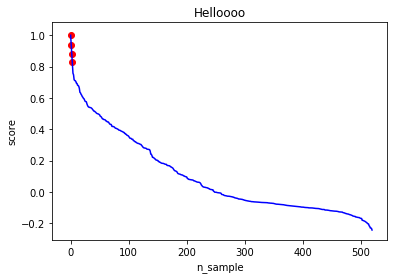

In [207]:
plot_match_scores(myscore, mytitle="Helloooo")

# LOAD INITIALIZE FINAL RESULTS

In [111]:
import os
import pickle
import random
import time

import matplotlib.pyplot as plt
import pandas as pd
from imutils import paths
from kneed import KneeLocator

import AccuracyGlobal
# import Accuracy as accuracy

import ImageSearch_Algo_Hash
import ImageSearch_Algo_HSV
import ImageSearch_Algo_ORB
import ImageSearch_Algo_RGB
import ImageSearch_Algo_SIFT
import ImageSearch_Plots as myplots
import Thresholding


In [112]:
TESTNAME = "Data520"
IMGDIR = r'./imagesbooks/'

# TESTNAME = "Data520_DENOISE2"
# IMGDIR = r'./images/imagesbooks_DENOISE2/'

# TESTNAME = "Data520_S320"
# IMGDIR = r'./images/imagesbooks_S320/'

# TESTNAME = "Data520_S160"
# IMGDIR = r'./images/imagesbooks_S160/'

# TESTNAME = "Data520_CT2.0"
# IMGDIR = r'./images/imagesbooks_CT2.0/'

# TESTNAME = 'Data520_EQ2 '       
# IMGDIR  = r'./images/imagesbooks_EQ2/'      

# TESTNAME = "DataUKBENCH10K"
# IMGDIR = r'./ukbench/'

# TESTNAME = "DataUKBENCH10K_EQ2"
# IMGDIR = r'./ukbench_all/imagesbooks_EQ2/'

ORB_FEATURES_LIMIT = 100
ORB_FEATURES_LIMIT2 = 500   
ORB_N_CLUSTERS = 500
ORB_N_CLUSTERS2 = 50    # 500 # (option2)

SIFT_FEATURES_LIMIT = 100
SIFT_FEATURES_LIMIT2 = 300
SIFT_N_CLUSTERS = 500
SIFT_N_CLUSTERS2 = 50   # 100 # (option2)

LOWE_RATIO = 0.7
SIFT_PREDICTIONS_COUNT = 100
RGB_PARAMETERCORRELATIONTHRESHOLD = 0.70 # not needed for generation
kneeHSV = 2
kneeRGB = 2
kneeORB = 2
kneeSIFT = 2
HASHLENGTH = 16
ACCURRACY_RANGE = 20

accuracy = AccuracyGlobal.AccuracyGlobal() # empty class genrated 
accuracy.read(IMGDIR)



# --------------- IMAGES  ----------------------#
imagepaths =  (list(paths.list_images(IMGDIR)))
myDataFiles = pd.DataFrame( {'file' : imagepaths })

print ('Testname: ', TESTNAME)
print ("Searching Features for ", len(imagepaths), "images in", IMGDIR)


# -----------  LOAD FEATUTES AND TREES from file  ------------ #

HybridAlgoList = ['whash', 'ahash']
AlgoGenList = ['whash', 'phash', 'dhash', 'ahash'] 

# Files 
file_HASH_Feature = 'data/' + TESTNAME + '_PandasDF_HASH_Features'
file_HASH_HybridTree = 'data/' + TESTNAME + '_HASH_Hybrid_Tree_' + str(('_').join (HybridAlgoList))
file_HSV_Cluster = 'data/' + 'test' + '_HSV_Cluster' + str(kneeHSV)
file_HSV_Feature = 'data/' + TESTNAME + '_PandasDF_HSV_Features'
file_HSV_Tree = 'data/' + TESTNAME + '_HSV_Tree'
file_ORB_Cluster = 'data/' + 'test' + '_ORB_Cluster' + str(kneeORB)
file_ORB_Feature = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(ORB_FEATURES_LIMIT)
file_ORB_TreeCluster = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(ORB_N_CLUSTERS)
file_Results = 'data/' + TESTNAME + '_Results'
file_RGB_Cluster = 'data/' + 'test' + '_RGB_Cluster' + str(kneeRGB)
file_RGB_Feature = 'data/' + TESTNAME + '_PandasDF_RGB_Features'
file_RGB_Tree = 'data/' + TESTNAME + '_RGB_Tree'
file_SIFT_Cluster = 'data/' + 'test' + '_SIFT_Cluster' + str(kneeSIFT)
file_SIFT_Feature = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(SIFT_FEATURES_LIMIT)
file_SIFT_TreeCluster = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(SIFT_N_CLUSTERS)

file_SIFT_Feature2 = 'data/' + TESTNAME + '_PandasDF_SIFT_Features_kp'+ str(SIFT_FEATURES_LIMIT2)
file_SIFT_TreeCluster2 = 'data/' + TESTNAME + '_SIFT_Tree_Cluster' + str(SIFT_N_CLUSTERS2) + 'kp'+str(SIFT_FEATURES_LIMIT2)

file_ORB_Feature2 = 'data/' + TESTNAME + '_PandasDF_ORB_Features_kp'+ str(ORB_FEATURES_LIMIT2)
file_ORB_TreeCluster2 = 'data/' + TESTNAME + '_ORB_Tree_Cluster' + str(ORB_N_CLUSTERS2) + 'kp'+str(ORB_FEATURES_LIMIT2)



# Features 
mydataRGB = ImageSearch_Algo_RGB.RGB_LOAD_FEATURES (file_RGB_Feature)
mydataHSV = ImageSearch_Algo_HSV.HSV_LOAD_FEATURES (file_HSV_Feature)
mydataSIFT = ImageSearch_Algo_SIFT.SIFT_LOAD_FEATURES (file_SIFT_Feature)
mydataSIFT2 = ImageSearch_Algo_SIFT.SIFT_LOAD_FEATURES (file_SIFT_Feature2)
mydataORB = ImageSearch_Algo_ORB.ORB_LOAD_FEATURES(file_ORB_Feature)
mydataORB2 = ImageSearch_Algo_ORB.ORB_LOAD_FEATURES(file_ORB_Feature2)
mydataHASH = ImageSearch_Algo_Hash.HASH_LOAD_FEATURES(file_HASH_Feature)

# Tree & Clusters 
myRGBtree = ImageSearch_Algo_RGB.RGB_Load_Tree (file_RGB_Tree)
myHSVtree = ImageSearch_Algo_HSV.HSV_Load_Tree (file_HSV_Tree)
mySIFTtree, mySIFTmodel, mySIFTFVHist = ImageSearch_Algo_SIFT.SIFT_Load_Tree_Model (file_SIFT_TreeCluster)
mySIFTtree2, mySIFTmodel2, mySIFTFVHist2 = ImageSearch_Algo_SIFT.SIFT_Load_Tree_Model (file_SIFT_TreeCluster2)
myORBtree, myORBmodel, myORBFVHist = ImageSearch_Algo_ORB.ORB_Load_Tree_Model(file_ORB_TreeCluster)
myORBtree2, myORBmodel2, myORBFVHist2 = ImageSearch_Algo_ORB.ORB_Load_Tree_Model(file_ORB_TreeCluster2)
myHybridtree =ImageSearch_Algo_Hash.HASH_Load_Tree (file_HASH_HybridTree)



Reading directory ./imagesbooks/
Found 520 files.
Loading Dict and Ground Truth.
Testname:  Data520
Searching Features for  520 images in ./imagesbooks/


In [14]:
# # ---------- search RGB Tree
def search_RGB(returnCount=100, mydataRGB=mydataRGB, write=False) : 
    imagematchesrgb , searchtimergb = ImageSearch_Algo_RGB.RGB_SEARCH_TREE (myRGBtree, mydataRGB, q_path, returnCount=returnCount)
    # y= autothreshold (imagematchesrgb)
    # toplist = toplist + y
    # print (y)
    if write: 
        a, d, ind, cnt = accuracy.accuracy_matches(q_path, imagematchesrgb, ACCURRACY_RANGE)
        row_dict['acc_rgb'] = a
        row_dict['index_rgb'] = ind
        row_dict['Count_rgb'] = cnt
        row_dict['quality_rgb'] = d
        row_dict['time_rgb'] = searchtimergb
        # print ('RGB Accuracy =',  a, '%', '| Quality:', d )
        # print ('Count', cnt, ' | position', ind)

    return imagematchesrgb , searchtimergb 

In [15]:
def search_RGB_Corr(returnCount=100, mydataRGB=mydataRGB, write=False): 
    imagematchesrgb , searchtimergb = ImageSearch_Algo_RGB.RGB_SEARCH(mydataRGB, q_path, correl_threshold=0.01)
    # y= autothreshold (imagematchesrgb)
    # toplist = toplist + y
    # print (y)
    if write: 
        a, d, ind, cnt = accuracy.accuracy_matches(q_path, imagematchesrgb, ACCURRACY_RANGE)
        row_dict['acc_rgb_corr'] = a
        row_dict['index_rgb_corr'] = ind
        row_dict['Count_rgb_corr'] = cnt
        row_dict['quality_rgb_corr'] = d
        row_dict['time_rgb_corr'] = searchtimergb
        # print ('RGB Accuracy =',  a, '%', '| Quality:', d )
        # print ('Count', cnt, ' | position', ind)

    return imagematchesrgb , searchtimergb 

In [16]:
q_path = './imagesbooks/ukbench10167.jpg' # tough one 
# q_path = q_paths[12]

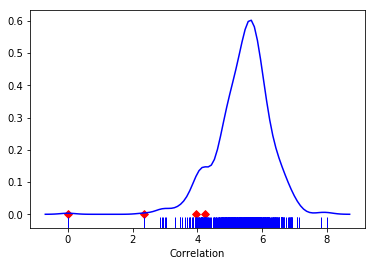

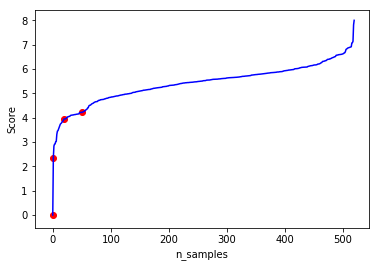

In [17]:
matches, t = search_RGB(returnCount=520)

plotDistribution(q_path, matches)
plot_match_scores(imagematches=matches)

# Start HERE 

In [245]:
# q_path = './imagesbooks/ukbench06049.jpg'
# q_path = './imagesbooks/ukbench10083.jpg'
# q_path = './imagesbooks/ukbench02729.jpg'
q_path

'./imagesbooks/ukbench10083.jpg'

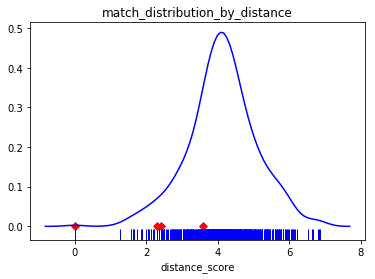

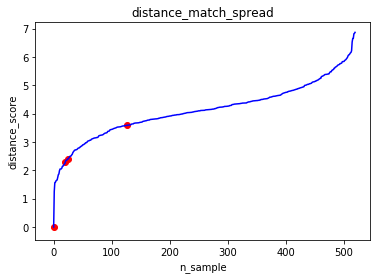

In [322]:
# q_path = './imagesbooks/ukbench06049.jpg'
# q_path = './imagesbooks/ukbench02724.jpg'
# q_path = './imagesbooks/ukbench05993.jpg'
q_path = './imagesbooks/ukbench02729.jpg'

# q_path = './images/imagesbooks_EQ2/ukbench05944.jpg'




# q_paths = ''

# showImages([q_path])
# showHistograms([q_path])

# get imageatches 
# matches, t = search_RGB_Corr(returnCount=520)   # for Corr based search 
# plotDistribution(q_path=q_path, imagematches=matches, myxlabel ='correlation_value', mytitle = 'match_distribution_by_correlation')
# plot_match_scores(imagematches=matches, myylabel= 'correlation_value',mytitle = 'correlation_match_spread')


matches, t = search_RGB(returnCount=520)  # for Tree search 
plotDistribution(q_path=q_path, imagematches=matches, myxlabel= 'distance_score',mytitle = 'match_distribution_by_distance')
plot_match_scores(imagematches=matches, myylabel='distance_score',mytitle='distance_match_spread')

In [323]:
# Unzip list of tuples (imagematches) to two separate lists
mScores, mFiles = zip(*matches)

# Format the scores to 2.2 float (2 precision) numbers
mScoresFormatted = [ ("Corr: %2.2f"%score) for score in mScores[:10] ]


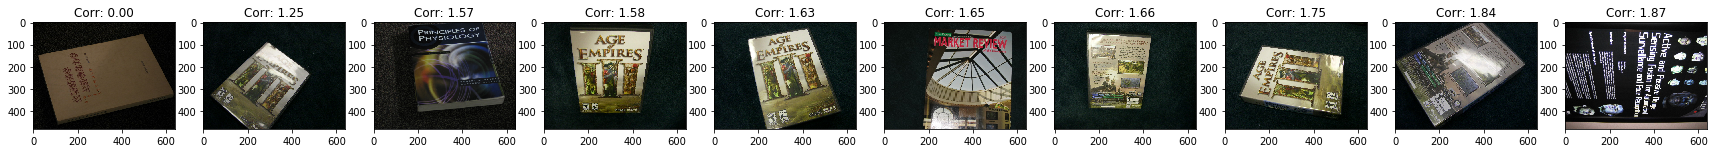

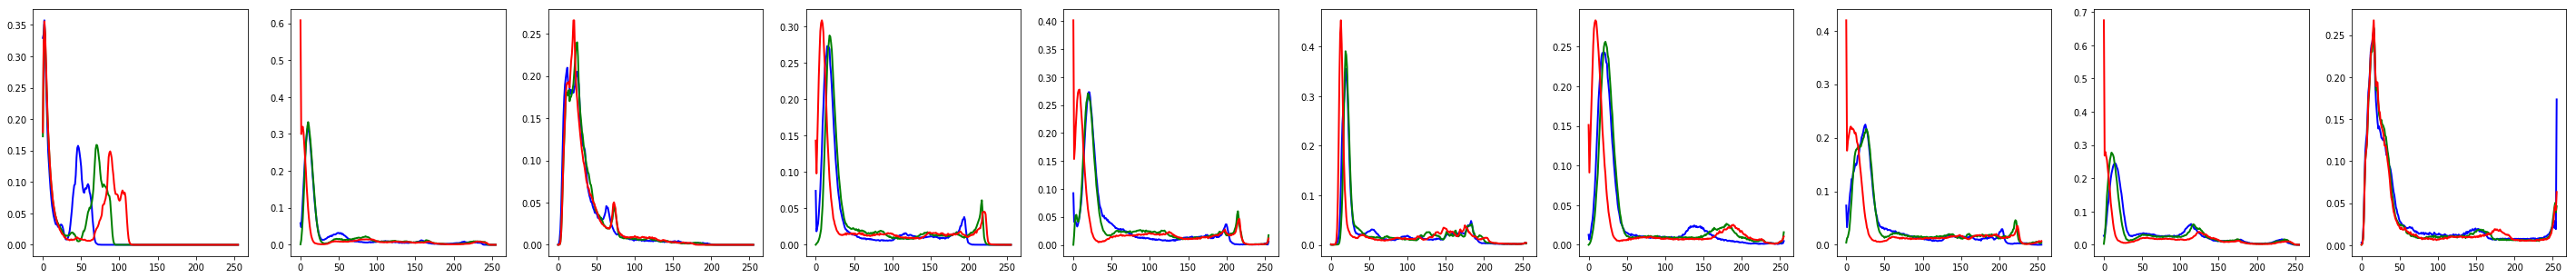

In [324]:
# showImages(mFiles[:12],texts=mScoresFormatted[:12])
# showHistograms(mFiles[:12],texts=mScoresFormatted[:12] )
showImagesTable(mFiles[:10],columns=10, texts=mScoresFormatted[:10])
showHistogramTable(mFiles[:10], columns=10)

./imagesbooks/ukbench10167.jpg


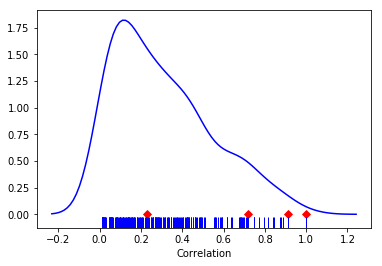

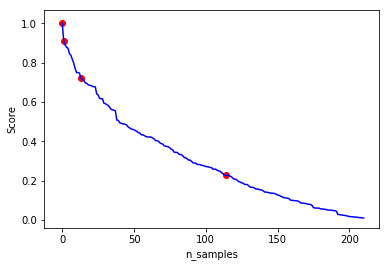

In [18]:
# do not use 
print (q_path)
matches, t = search_RGB_Corr(returnCount=520)
plotDistribution(q_path, matches)
plot_match_scores(imagematches=matches)

# Correlation Matrix 

In [333]:
imagepaths = sorted (imagepaths)

In [334]:
matches, t = search_RGB_Corr(returnCount=520)
# matches, t = search_RGB(returnCount=520)

In [335]:
myrow_dict = dict((y, x) for x, y in matches)
myrow_dict['file'] = q_path
# myrow_dict

# Example pandas df for corr matrix
corrTable = pd.DataFrame ()
corrTable = corrTable.append (myrow_dict,ignore_index=True)
corrTable.set_index('file')

,./imagesbooks/ukbench00480.jpg,./imagesbooks/ukbench00481.jpg,./imagesbooks/ukbench00482.jpg,./imagesbooks/ukbench00483.jpg,./imagesbooks/ukbench00485.jpg,./imagesbooks/ukbench02717.jpg,./imagesbooks/ukbench02718.jpg,./imagesbooks/ukbench02721.jpg,./imagesbooks/ukbench02722.jpg,./imagesbooks/ukbench02724.jpg,...,./imagesbooks/ukbench10158.jpg,./imagesbooks/ukbench10159.jpg,./imagesbooks/ukbench10160.jpg,./imagesbooks/ukbench10161.jpg,./imagesbooks/ukbench10162.jpg,./imagesbooks/ukbench10163.jpg,./imagesbooks/ukbench10164.jpg,./imagesbooks/ukbench10165.jpg,./imagesbooks/ukbench10166.jpg,./imagesbooks/ukbench10167.jpg
file,,,,,,,,,,,,,,,,,,,,,
./imagesbooks/ukbench10167.jpg,0.277181,0.257916,0.586657,0.271856,0.136373,0.355898,0.304683,0.226273,0.460151,0.21924,...,0.421107,0.618285,0.248013,0.676816,0.491998,0.796924,0.911795,0.720333,0.227319,1.0


In [336]:
corrTable = pd.DataFrame (columns=['file'])

for q_path in imagepaths: 
    matches, t = search_RGB(returnCount=520)
    myrow_dict = dict((y, x) for x, y in matches)
    myrow_dict['file'] = q_path
    # myrow_dict

    # Example pandas df for corr matrix
    corrTable = corrTable.append (myrow_dict,ignore_index=True)
corrTable = corrTable.set_index('file')

In [337]:
corrTable.shape # note this is a pd dataframe

(520, 520)

In [338]:
L = np.asarray (corrTable)

### Selectivity increased 

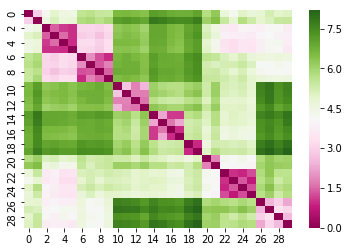

In [339]:
sns.heatmap( L[150:180, 150:180], cmap="PiYG")   # PiYG # BuGn
# sns.heatmap( L[200:230, 200:230], cmap="PiYG")   # PiYG # BuGn

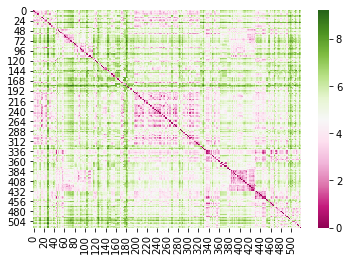

In [340]:
sns.heatmap( L, cmap="PiYG")   # PiYG # BuGn

# Some Testing -- DONOT USE

In [29]:
# visualizing the histogram
def showHistogramsSNS (q_paths): # list of paths 
    for q_path in q_paths:
        img = cv2.imread(q_path)
        color = ('b','g','r')
        plt.figure(figsize=(4,4))
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            histr = cv2.normalize(histr, None)
            x = histr.reshape(256)
            sns.kdeplot(x, shade=True, color=col)
            
        plt.title(q_path)
        plt.show()

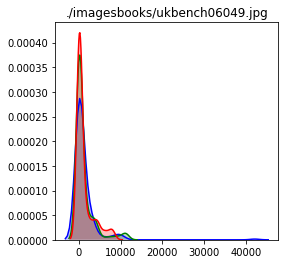

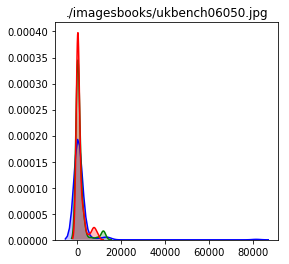

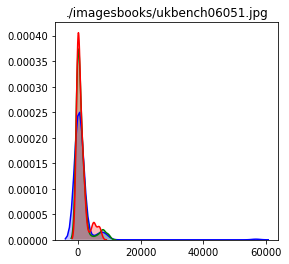

In [30]:
showHistogramsSNS(q_paths[:3])

In [23]:
img = cv2.imread(q_path)
color = ('b','g','r')
plt.figure(figsize=(4,4))
# for i,col in enumerate(color):
histr = cv2.calcHist([img],[0],None,[256],[0,256])
histr = cv2.normalize(histr, None)
# plt.plot(histr,color = col, linewidth=2.0)
# plt.xlim([0,256])

<Figure size 288x288 with 0 Axes>

In [24]:
x = histr.reshape(256)

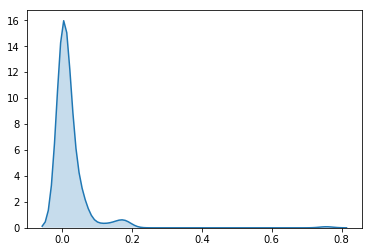

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.kdeplot(x, shade=True)

In [31]:
x

array([7.56106138e-01, 1.59975916e-01, 1.72454387e-01, 1.79474652e-01,
       1.88775167e-01, 1.84609681e-01, 1.77625328e-01, 1.68594137e-01,
       1.59688637e-01, 1.46527886e-01, 1.34103268e-01, 1.23115018e-01,
       1.09702900e-01, 9.84094217e-02, 8.59488994e-02, 7.51581565e-02,
       6.72401562e-02, 5.57850897e-02, 4.82082292e-02, 4.00029570e-02,
       3.47781517e-02, 2.96072140e-02, 2.39874087e-02, 2.11505760e-02,
       1.86189692e-02, 1.69132780e-02, 1.54230427e-02, 1.37353055e-02,
       1.21912062e-02, 1.18141584e-02, 1.10241538e-02, 1.01084663e-02,
       9.12096072e-03, 9.28255264e-03, 7.91799929e-03, 7.77436234e-03,
       6.73299283e-03, 6.44571846e-03, 6.03276165e-03, 5.76344179e-03,
       5.97889768e-03, 5.97889768e-03, 6.60731038e-03, 7.25367758e-03,
       7.12799514e-03, 7.57686142e-03, 8.07959121e-03, 8.61823093e-03,
       8.70800391e-03, 9.24664363e-03, 9.74937342e-03, 1.03957411e-02,
       1.10421088e-02, 1.08984709e-02, 1.15089295e-02, 1.27657549e-02,
      